In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# Read in data
df = pd.read_csv(r'C:\Users\dell\Desktop/Pythonprogramming/learningnpractcesentimentanalysis/KLSE_MYEG_3test1.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(264, 3)
(264, 3)


In [3]:
df.head()

,Id,Comments,Comments_translated
0,1,老板说了这个agmo股票是bonus\ncash dividend今年继续... ...,The boss said that this Agmo stock is BONUS\nC...
1,2,Ita so weird to see myeg hard to move right no...,Ita so weird to see myeg hard to move right no...
2,3,For first TP.. Im waiting to cross this first ...,For first TP.. Im waiting to cross this first ...
3,4,Strong 15 minute timeframework should hold and...,Strong 15 minute timeframework should hold and...
4,5,明天myeg的egm哪位股友有出席？？,Tomorrow myeg's EGM's stock friends will atten...


In [4]:
#Basic NLTK

In [5]:
example = df['Comments_translated'][168]
print(example)

limit down tomorrow


In [6]:
nltk.word_tokenize(example)

['limit', 'down', 'tomorrow']

In [7]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['limit', 'down', 'tomorrow']

In [8]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('limit', 'NN'), ('down', 'RP'), ('tomorrow', 'NN')]

In [9]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S limit/NN down/RP tomorrow/NN)


In [10]:
#1 model >> VADER Sentiment Scoring 

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [12]:
sia.polarity_scores('I am so sad!')

{'neg': 0.648, 'neu': 0.352, 'pos': 0.0, 'compound': -0.5697}

In [13]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [14]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [15]:
# Run polarity score on the entire dataset 

In [16]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Comments_translated']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/264 [00:00<?, ?it/s]

In [17]:
res

{1: {'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.6408},
 2: {'neg': 0.039, 'neu': 0.825, 'pos': 0.136, 'compound': 0.8522},
 3: {'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.2732},
 4: {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.5106},
 5: {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.4767},
 6: {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4939},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.5106},
 13: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.474},
 16: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound'

In [18]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.768,0.232,0.6408
2,0.039,0.825,0.136,0.8522
3,0.000,0.877,0.123,0.2732
4,0.000,0.852,0.148,0.5106
5,0.000,0.693,0.307,0.4767
...,...,...,...,...
260,0.000,1.000,0.000,0.0000
261,0.296,0.704,0.000,-0.2732
262,0.239,0.658,0.103,-0.5106
263,0.000,1.000,0.000,0.0000


In [19]:
vaders = pd.DataFrame(res).T

In [20]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [21]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,Comments,Comments_translated
0,1,0.000,0.768,0.232,0.6408,老板说了这个agmo股票是bonus\ncash dividend今年继续... ...,The boss said that this Agmo stock is BONUS\nC...
1,2,0.039,0.825,0.136,0.8522,Ita so weird to see myeg hard to move right no...,Ita so weird to see myeg hard to move right no...
2,3,0.000,0.877,0.123,0.2732,For first TP.. Im waiting to cross this first ...,For first TP.. Im waiting to cross this first ...
3,4,0.000,0.852,0.148,0.5106,Strong 15 minute timeframework should hold and...,Strong 15 minute timeframework should hold and...
4,5,0.000,0.693,0.307,0.4767,明天myeg的egm哪位股友有出席？？,Tomorrow myeg's EGM's stock friends will atten...


In [22]:
vaders

,Id,neg,neu,pos,compound,Comments,Comments_translated
0,1,0.000,0.768,0.232,0.6408,老板说了这个agmo股票是bonus\ncash dividend今年继续... ...,The boss said that this Agmo stock is BONUS\nC...
1,2,0.039,0.825,0.136,0.8522,Ita so weird to see myeg hard to move right no...,Ita so weird to see myeg hard to move right no...
2,3,0.000,0.877,0.123,0.2732,For first TP.. Im waiting to cross this first ...,For first TP.. Im waiting to cross this first ...
3,4,0.000,0.852,0.148,0.5106,Strong 15 minute timeframework should hold and...,Strong 15 minute timeframework should hold and...
4,5,0.000,0.693,0.307,0.4767,明天myeg的egm哪位股友有出席？？,Tomorrow myeg's EGM's stock friends will atten...
...,...,...,...,...,...,...,...
259,260,0.000,1.000,0.000,0.0000,You mean from 10B to 6B market cap,You mean from 10B to 6B market cap
260,261,0.296,0.704,0.000,-0.2732,Naik punya slow. Drop mcm maaciibaiiii,Naik has slow. Drop MCM Maaciibaiiiii
261,262,0.239,0.658,0.103,-0.5106,投资myeg 就像买大小一样，看谁执政，猜中了，就大赢。猜错了，就大输,Investing MyEG is just like buying the size. I...
262,263,0.000,1.000,0.000,0.0000,70c I wait u,70c I wait u


<AxesSubplot:>

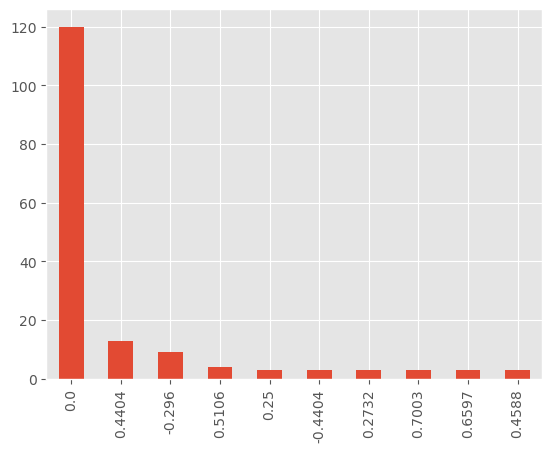

In [23]:
vaders['compound'].value_counts().head(10).plot.bar()

<AxesSubplot:>

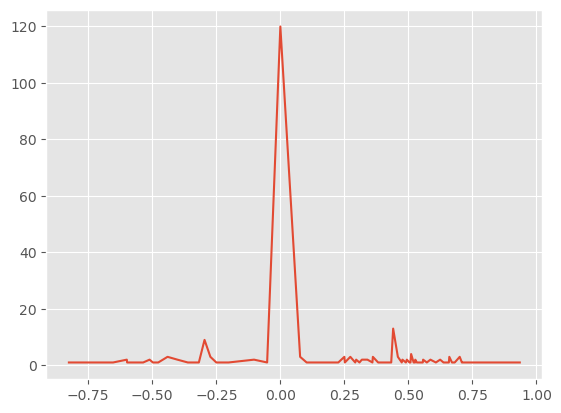

In [24]:
vaders['compound'].value_counts().sort_index().plot.line()

In [25]:
#Roberta Pretrained Model

In [26]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [28]:
print(example)
sia.polarity_scores(example)

limit down tomorrow


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [29]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.10863415, 'roberta_neu': 0.79002225, 'roberta_pos': 0.101343594}


In [30]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [31]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Comments_translated']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/264 [00:00<?, ?it/s]

In [32]:
vader_result

{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.2732}

In [33]:
roberta_result

{'roberta_neg': 0.22200853, 'roberta_neu': 0.701115, 'roberta_pos': 0.0768765}

In [34]:
both

{'vader_neg': 0.512,
 'vader_neu': 0.488,
 'vader_pos': 0.0,
 'vader_compound': -0.2732,
 'roberta_neg': 0.22200853,
 'roberta_neu': 0.701115,
 'roberta_pos': 0.0768765}

In [44]:

#Overall Conclusion From the Data. 

#Based one the Sentiment analysis using VADER Sentiment Scoring model ,vader_compound shows that negative value which is -0.2732 .Its show that the sentiment are negative for this model. 

#Based one the Sentiment analysis using Roberta Pretrained Model, the highest values are roberta_neutral  : 0.701115 . Its show that the sentiment are neutral for this model. 

In [35]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [36]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Comments',
       'Comments_translated'],
      dtype='object')

In [37]:
results_df.head(3)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Comments,Comments_translated
0,1,0.000,0.768,0.232,0.6408,0.027680,0.823921,0.148399,老板说了这个agmo股票是bonus\ncash dividend今年继续... ...,The boss said that this Agmo stock is BONUS\nC...
1,2,0.039,0.825,0.136,0.8522,0.201157,0.540981,0.257862,Ita so weird to see myeg hard to move right no...,Ita so weird to see myeg hard to move right no...
2,3,0.000,0.877,0.123,0.2732,0.005154,0.492228,0.502618,For first TP.. Im waiting to cross this first ...,For first TP.. Im waiting to cross this first ...


In [38]:
# Compare Scores between models

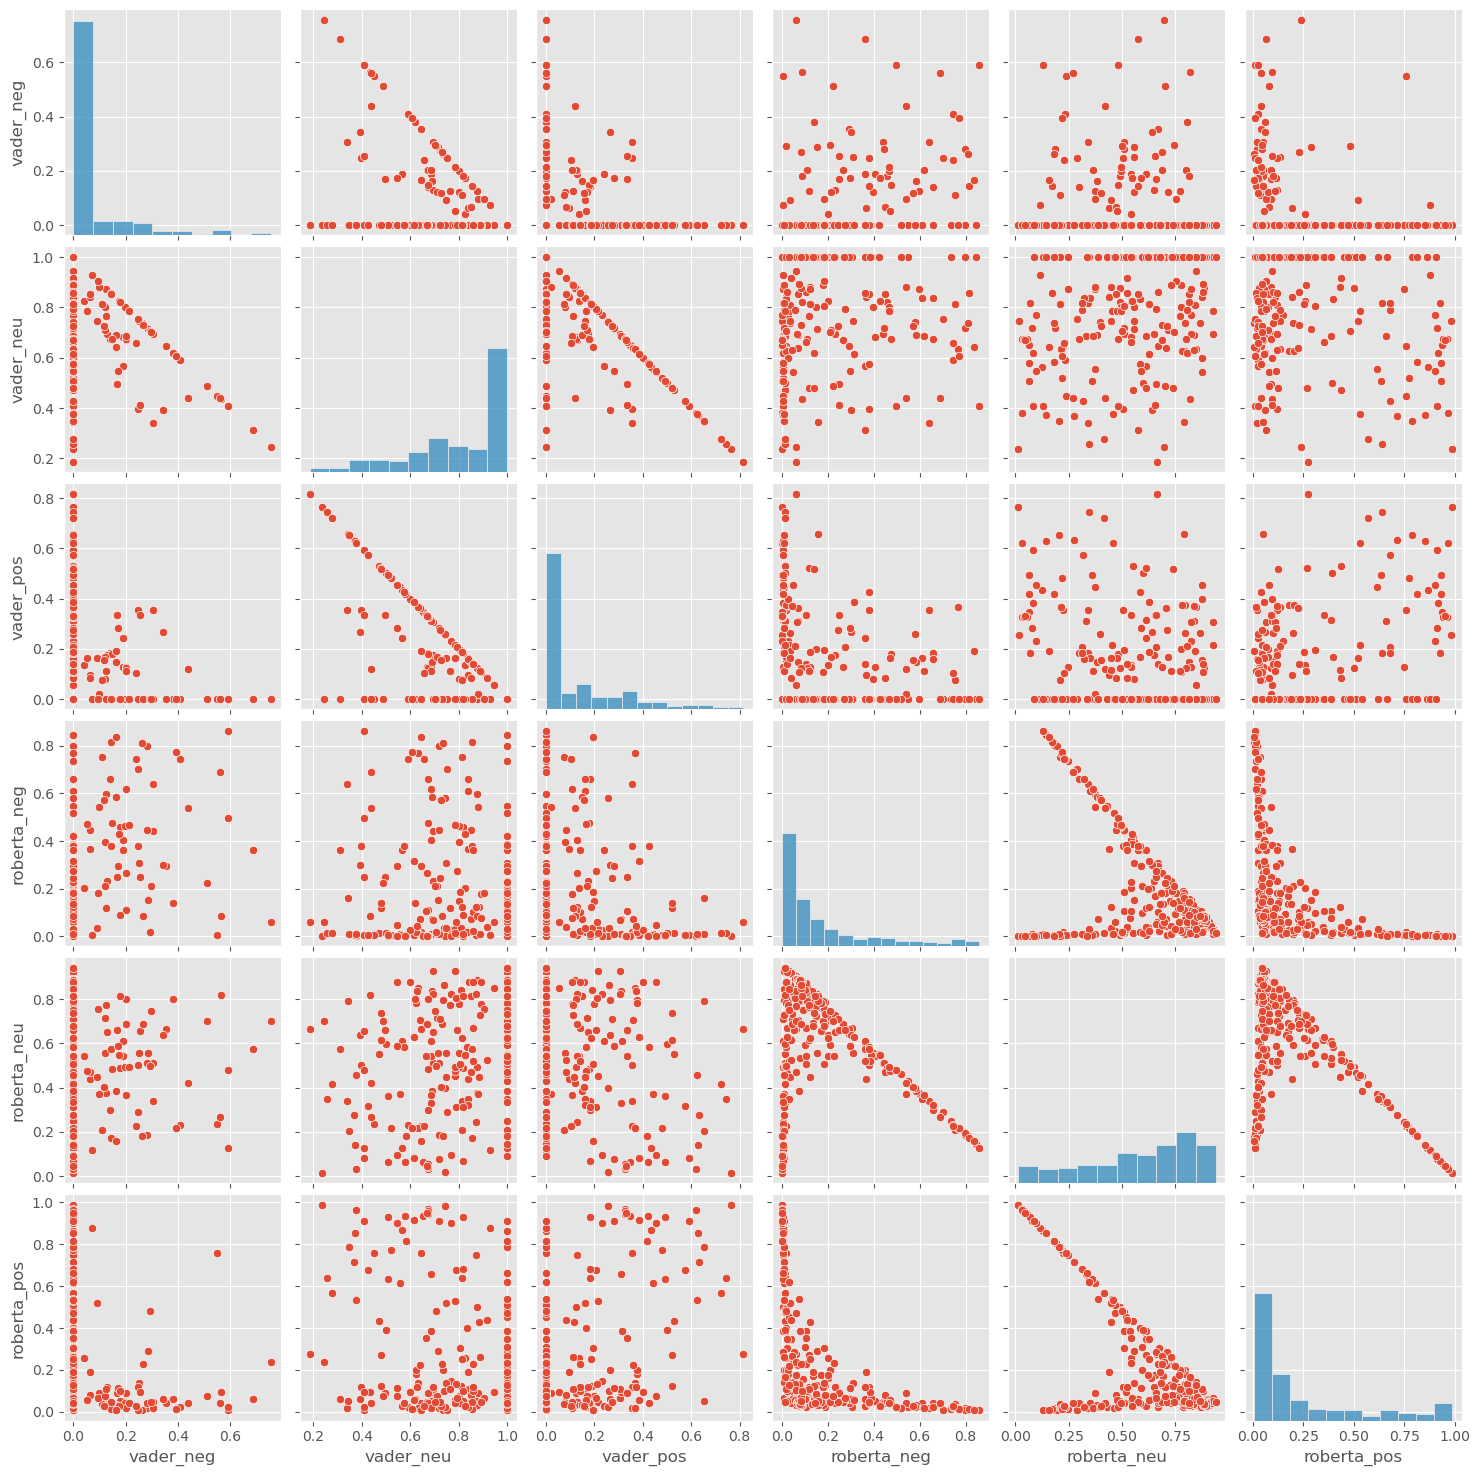

In [39]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            palette='tab10')
plt.show()

In [40]:
# Extra: The Transformers Pipeline
# Quick & easy way to run sentiment predictions

In [41]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [42]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [43]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]